In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#from plot_results import convert_signal, comparison_signals, comparison_freq, qtrans_plot, gwpy_to_pycbc, pycbc_to_gwpy
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['font.size'] = 14  # global font size
import sys
sys.path.append('/home/victor-glorieux/Internship_Victor_CBC_ET')
sys.path.append('/home/victor/Internship_Victor_CBC_ET')
import numpy as np
import pandas as pd
from plot_functions import plot_mnimisation, plot_correlation_2_params

/home/victor/miniconda3/envs/pycbc_env/lib/python3.9/site-packages/pycbc/inference/models/__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import iter_entry_points as _iter_entry_points


Iterations totales :  250000
(500, 500)
Maximum log-likelihood ratio at: -211734.45308691706
ra = 1.37
dec = -1.26


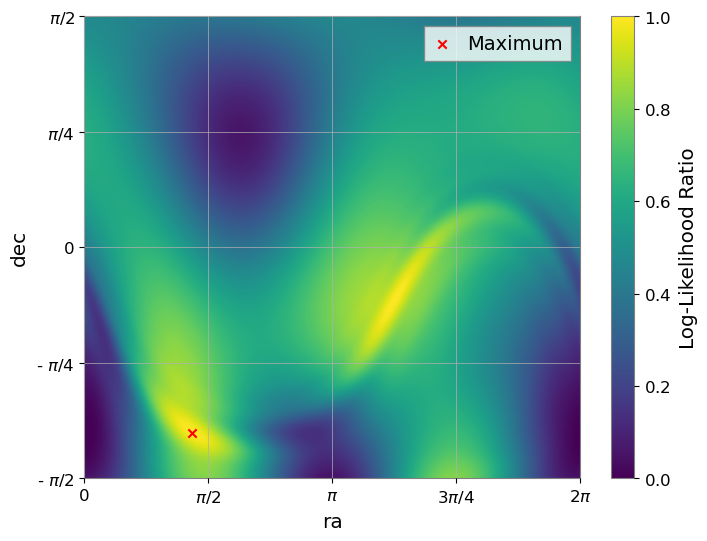

In [4]:
import generation_signal

sample_rate = 2048
fmin = 5.
cbc_params = {
            # Paramètres intrinsèques à la source
            'mass1': 38.6,
            'mass2': 29.3,
            'spin1x': 0., 'spin2x': 0.,  'spin1y': 0., 'spin2y': 0.,  'spin1z': 0., 'spin2z': 0.,
            'eccentricity': 0,
            # Paramètres extrinsèques
            'ra': 1.37, 'dec': -1.26, 'distance': 1000,
            'polarization': 2.76, 'inclination': 0,
            'tc': 3.1 , 'coa_phase': 0}

model, log_noise_likelihood_from_SNR, signal = generation_signal.generation_signal_GW(cbc_params,sample_rate,
                                                                              fmin,noise=False,print_snr=False)

bounds_x = {"minx" : 0, "maxx" : 2*np.pi}
bounds_y = {"miny" : -np.pi/2, "maxy" : np.pi/2}
#bounds_color = {"vmin" : -1000000, "vmax" : 1000000}
xticks = {"values" : [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], "labels" : [r'0', r'$\pi$/2', r'$\pi$', r'3$\pi$/4', r'2$\pi$']}
yticks = {"values" : [-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], "labels" : [r'- $\pi$/2', r'- $\pi$/4', r'0', r'$\pi$/4', r'$\pi$/2']}
plot_correlation_2_params(model,cbc_params,param_x_name='ra',param_y_name='dec',range_x=1,range_y=1,ech_x=2*np.pi/500,ech_y=np.pi/500,
                          x_label=r'ra',y_label=r'dec',bounds_x = bounds_x,bounds_y = bounds_y, xticks=xticks, yticks=yticks)